In [1]:
from utils.CaImageCSV import CaImageCSV

In [19]:
csv = CaImageCSV('./resources/ID181106CreA_Longitudinal_Traces.csv')

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [50]:
context_data = csv.filtered_by_context('HC2')
context_data

C000       C001      C002        C003       C004      C005  \
1   2                                                                          
HC2 1456.185  23.40221  18.307760  16.38554  117.855200   7.017669  22.18379   
NaN 1456.285  21.35612  16.702530  14.77743  105.749800   6.410332  20.08984   
    1456.385  27.63065  15.238040  13.32715   94.887890   5.855390  25.90884   
    1456.485  41.15630  13.901950  12.01920   85.141590   5.348323  23.46328   
    1456.585  37.56752  12.683010  10.83962   76.396350   4.885001  21.24856   
...                ...        ...       ...         ...        ...       ...   
    2066.685  30.19063  10.693480   0.00000    7.982697  40.273220  24.93776   
    2066.785  40.08604   9.755848   0.00000    7.162673  36.796910  31.25593   
    2066.885  36.59026   8.900427   0.00000    6.426878  33.620490  28.30566   
    2066.985  33.39823   8.120005   0.00000    5.766658  30.718110  25.63386   
HC2 2067.085  30.48356   7.408009   0.00000    5.174252  28.066120  23.21426   

                  C006      C007      C008      C009  ...  C773  C774  C775  \
1   2                                                 ...                     
HC2 1456.185  19.93862  37.30780  22.48633  17.80719  ...   NaN   NaN   NaN   
NaN 1456.285  18.37292  42.27759  20.14202  15.74402  ...   NaN   NaN   NaN   
    1456.385  16.93017  38.34389  18.04176  13.91961  ...   NaN   NaN   NaN   
    1456.485  15.60071  34.77502  16.16015  24.83253  ...   NaN   NaN   NaN   
    1456.585  14.37565  38.22731  14.47444  21.95634  ...   NaN   NaN   NaN   
...                ...       ...       ...       ...  ...   ...   ...   ...   
    2066.685  19.86508  58.58101  30.43721  34.23499  ...   NaN   NaN   NaN   
    2066.785  18.30516  59.55898  27.26516  37.16280  ...   NaN   NaN   NaN   
    2066.885  16.86773  67.10181  24.42334  41.54234  ...   NaN   NaN   NaN   
    2066.985  15.54318  60.86576  21.87737  36.73239  ...   NaN   NaN   NaN   
HC2 2067.085  14.32263  55.20807  19.59645  32.47908  ...   NaN   NaN   NaN   

              C776  C777  C778  C779  C780  C781  C782  
1   2                                                   
HC2 1456.185   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
NaN 1456.285   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.385   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.485   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    1456.585   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...            ...   ...   ...   ...   ...   ...   ...  
    2066.685   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.785   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.885   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    2066.985   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
HC2 2067.085   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[6110 rows x 767 columns]

In [51]:
# items = CaImageCSV.optimize_std(context_data)
# items

In [52]:
from matplotlib import pyplot as plt
from oasis.functions import deconvolve
from oasis.plotting import simpleaxis

In [53]:
numpyed_items = csv.optimize_std_by_series(context_data['C000'].fillna(0.0)).to_numpy()
print(numpyed_items[-10:-1])
context_data['C000'].astype(float).fillna(0.0).std(skipna=False)

[0.5334868  0.48685442 0.77389798 0.79376773 0.72451887 0.6612874
 0.87803378 0.80146316 0.7315458 ]


45.65432533911817

In [54]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(None, None), penalty=1)

CPU times: user 86.8 ms, sys: 0 ns, total: 86.8 ms
Wall time: 18.8 ms


In [55]:
times = len(s) /10.0
count = len(s[s > 0.05])
rate = count / times

s[s < 0.05] = 0.0
rate

0.23076923076923078

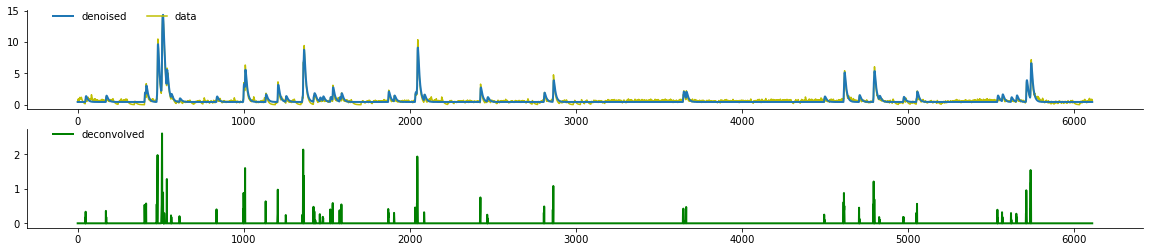

In [56]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
# plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()

In [57]:
numpyed_items = csv.optimize_std_by_series(context_data['C001'].fillna(0.0)).to_numpy()
print(numpyed_items[-10:-1])
context_data['C001'].astype(float).fillna(0.0).std(skipna=False)

[1.10745679 1.01035481 0.92176586 0.84094376 0.76720843 0.69993806
 0.63856568 0.58257439 0.53149214]


15.27775183837453

In [58]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(None,None), penalty=1)

CPU times: user 670 ms, sys: 12.5 ms, total: 682 ms
Wall time: 119 ms


In [59]:
times = len(s) /10.0
count = len(s[s > 0.05])
rate = count / times

s[s < 0.05] = 0.0

rate

1.9509001636661212

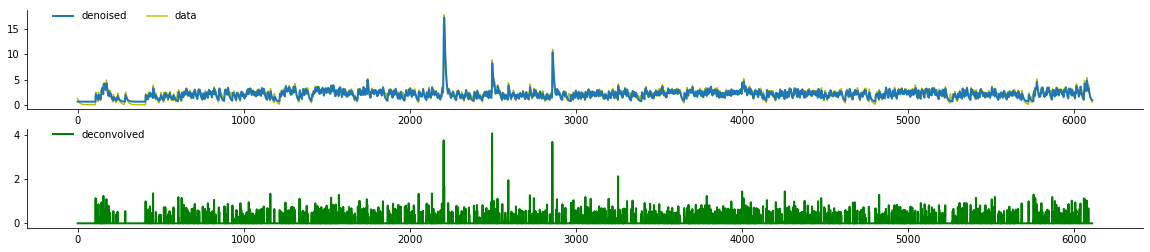

In [60]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
# plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()